In [ ]:
import time
start = time.time()

import pandas as pd
import numpy as np

import os


import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uxp = pd.read_pickle('/content/drive/MyDrive/data/uxp_final.pkl')
#uxp = uxp.iloc[0:150000]
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,distance
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,5.363636,0.697339
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,5.363636,0.653100
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,5.363636,0.508882
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,5.363636,0.579517
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,5.363636,0.550634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727,0.630583,9.194723,0.000831,1.0,1.0,1.0,1.0,9.214286,0.444400
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000,0.401148,10.109900,0.000000,0.0,0.0,0.0,0.0,9.214286,0.406055
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000,0.699288,8.344942,0.001525,1.0,1.0,1.0,1.0,9.214286,0.335111
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000,0.357661,8.763058,0.002044,1.0,1.0,1.0,1.0,9.214286,0.477282


In [ ]:
%cd /content/drive/MyDrive/data
!unzip orders.csv.zip -d /content/data
!unzip order_products__train.csv.zip -d /content/data
!unzip order_products__prior.csv.zip -d /content/data
!unzip /content/drive/MyDrive/data/products.csv.zip -d /content/data

/content/drive/MyDrive/data
Archive:  orders.csv.zip
  inflating: /content/data/orders.csv  
   creating: /content/data/__MACOSX/
  inflating: /content/data/__MACOSX/._orders.csv  
Archive:  order_products__train.csv.zip
  inflating: /content/data/order_products__train.csv  
  inflating: /content/data/__MACOSX/._order_products__train.csv  
Archive:  order_products__prior.csv.zip
  inflating: /content/data/order_products__prior.csv  
  inflating: /content/data/__MACOSX/._order_products__prior.csv  
Archive:  /content/drive/MyDrive/data/products.csv.zip
  inflating: /content/data/products.csv  
  inflating: /content/data/__MACOSX/._products.csv  


In [ ]:
orders = pd.read_csv('/content/data/orders.csv' )
order_products_train = pd.read_csv('/content/data/order_products__train.csv')
order_products_prior = pd.read_csv('/content/data/order_products__prior.csv')


In [ ]:
orders_last = orders[(orders.eval_set=='train') | (orders.eval_set=='test') ]

In [ ]:
uxp=uxp.drop('Times_Bought_N', axis=1)

In [ ]:
uxp = uxp.merge(orders_last, on='user_id', how='left')
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,...,item_N4_ratio,item_N5_ratio,order_size_avg,distance,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,196.0,10,0.417500,4.0,0.8,11,1,11,0.909091,...,1.0,1.0,5.363636,0.697339,1187899,train,11,4,8,14.0
1,1,10258.0,9,0.447038,4.0,0.8,11,2,10,0.900000,...,1.0,1.0,5.363636,0.653100,1187899,train,11,4,8,14.0
2,1,10326.0,1,0.478419,NaN,NaN,11,5,7,0.142857,...,1.0,1.0,5.363636,0.508882,1187899,train,11,4,8,14.0
3,1,12427.0,10,0.470518,4.0,0.8,11,1,11,0.909091,...,1.0,1.0,5.363636,0.579517,1187899,train,11,4,8,14.0
4,1,13032.0,3,0.520218,2.0,0.4,11,2,10,0.300000,...,1.0,1.0,5.363636,0.550634,1187899,train,11,4,8,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,14,4,11,0.272727,...,1.0,1.0,9.214286,0.444400,272231,train,14,6,14,30.0
13307949,206209,44325.0,1,0.710110,NaN,NaN,14,7,8,0.125000,...,0.0,0.0,9.214286,0.406055,272231,train,14,6,14,30.0
13307950,206209,48370.0,1,0.407439,1.0,0.2,14,11,4,0.250000,...,1.0,1.0,9.214286,0.335111,272231,train,14,6,14,30.0
13307951,206209,48697.0,1,0.739338,NaN,NaN,14,7,8,0.125000,...,1.0,1.0,9.214286,0.477282,272231,train,14,6,14,30.0


In [ ]:
uxp_train = uxp[uxp.eval_set=='train']

uxp_train = uxp_train.merge(order_products_train, on=['product_id', 'order_id'], how='left' )

uxp_train = uxp_train.drop(['order_id','eval_set', 'add_to_cart_order'], axis=1)
uxp_train = uxp_train.fillna(0)
uxp_train.head(20)

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,...,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,distance,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,196.0,10,0.417500,4.0,0.8,11,1,11,0.909091,...,1.0,1.0,1.0,5.363636,0.697339,11,4,8,14.0,1.0
1,1,10258.0,9,0.447038,4.0,0.8,11,2,10,0.900000,...,1.0,1.0,1.0,5.363636,0.653100,11,4,8,14.0,1.0
2,1,10326.0,1,0.478419,0.0,0.0,11,5,7,0.142857,...,1.0,1.0,1.0,5.363636,0.508882,11,4,8,14.0,0.0
3,1,12427.0,10,0.470518,4.0,0.8,11,1,11,0.909091,...,1.0,1.0,1.0,5.363636,0.579517,11,4,8,14.0,0.0
4,1,13032.0,3,0.520218,2.0,0.4,11,2,10,0.300000,...,1.0,1.0,1.0,5.363636,0.550634,11,4,8,14.0,1.0
5,1,13176.0,2,0.288116,0.0,0.0,11,2,10,0.200000,...,1.0,1.0,1.0,5.363636,0.564106,11,4,8,14.0,0.0
6,1,14084.0,1,0.370850,0.0,0.0,11,1,11,0.090909,...,1.0,1.0,1.0,5.363636,0.537754,11,4,8,14.0,0.0
7,1,17122.0,1,0.472574,0.0,0.0,11,5,7,0.142857,...,1.0,1.0,1.0,5.363636,0.480960,11,4,8,14.0,0.0
8,1,25133.0,8,0.419255,4.0,0.8,11,3,9,0.888889,...,1.0,1.0,1.0,5.363636,0.639877,11,4,8,14.0,1.0
9,1,26088.0,2,0.595013,0.0,0.0,11,1,11,0.181818,...,1.0,1.0,1.0,5.363636,0.528152,11,4,8,14.0,1.0


In [ ]:
uxp_test = uxp[uxp.eval_set=='test']
uxp_test = uxp_test.drop(['eval_set', 'order_id'], axis=1)
uxp_test = uxp_test.fillna(0)
uxp_test.head(20)

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,...,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,distance,order_number,order_dow,order_hour_of_day,days_since_prior_order
120,3,248.0,1,0.720492,0.0,0.0,13,2,12,0.083333,...,1.0,1.0,1.0,1.0,6.769231,0.508189,13,5,15,11.0
121,3,1005.0,1,0.687259,1.0,0.2,13,10,4,0.250000,...,1.0,0.0,0.0,0.0,6.769231,0.463285,13,5,15,11.0
122,3,1819.0,3,0.653128,0.0,0.0,13,4,10,0.300000,...,1.0,1.0,1.0,1.0,6.769231,0.647959,13,5,15,11.0
123,3,7503.0,1,0.616269,0.0,0.0,13,3,11,0.090909,...,1.0,1.0,1.0,1.0,6.769231,0.660512,13,5,15,11.0
124,3,8021.0,1,0.559164,0.0,0.0,13,2,12,0.083333,...,1.0,1.0,1.0,1.0,6.769231,0.309166,13,5,15,11.0
125,3,9387.0,5,0.530830,0.0,0.0,13,1,13,0.384615,...,1.0,1.0,1.0,1.0,6.769231,0.519028,13,5,15,11.0
126,3,12845.0,1,0.742956,0.0,0.0,13,4,10,0.100000,...,1.0,1.0,1.0,1.0,6.769231,0.529940,13,5,15,11.0
127,3,14992.0,2,0.572936,0.0,0.0,13,6,8,0.250000,...,1.0,1.0,1.0,1.0,6.769231,0.546078,13,5,15,11.0
128,3,15143.0,1,0.641919,0.0,0.0,13,1,13,0.076923,...,1.0,1.0,1.0,1.0,6.769231,0.464551,13,5,15,11.0
129,3,16797.0,3,0.433382,1.0,0.2,13,1,13,0.230769,...,1.0,1.0,1.0,1.0,6.769231,0.582446,13,5,15,11.0


In [ ]:
uxp_train = uxp_train.set_index(['user_id', 'product_id'])
uxp_test = uxp_test.set_index(['user_id', 'product_id'])

In [ ]:
uxp_train

uxp_total_bought  one_shot_ratio_product  times_last5  \
user_id product_id                                                          
1       196.0                     10                0.417500          4.0   
        10258.0                    9                0.447038          4.0   
        10326.0                    1                0.478419          0.0   
        12427.0                   10                0.470518          4.0   
        13032.0                    3                0.520218          2.0   
...                              ...                     ...          ...   
206209  43961.0                    3                0.485358          1.0   
        44325.0                    1                0.710110          0.0   
        48370.0                    1                0.407439          1.0   
        48697.0                    1                0.739338          0.0   
        48742.0                    2                0.641204          1.0   

                    times_last5_ratio  total_orders  first_order_number  \
user_id product_id                                                        
1       196.0                     0.8            11                   1   
        10258.0                   0.8            11                   2   
        10326.0                   0.0            11                   5   
        12427.0                   0.8            11                   1   
        13032.0                   0.4            11                   2   
...                               ...           ...                 ...   
206209  43961.0                   0.2            14                   4   
        44325.0                   0.0            14                   7   
        48370.0                   0.2            14                  11   
        48697.0                   0.0            14                   7   
        48742.0                   0.2            14                   7   

                    Order_Range_D  Order_Ratio_user_id_X_product_id  \
user_id product_id                                                    
1       196.0                  11                          0.909091   
        10258.0                10                          0.900000   
        10326.0                 7                          0.142857   
        12427.0                11                          0.909091   
        13032.0                10                          0.300000   
...                           ...                               ...   
206209  43961.0                11                          0.272727   
        44325.0                 8                          0.125000   
        48370.0                 4                          0.250000   
        48697.0                 8                          0.125000   
        48742.0                 8                          0.250000   

                    reorder_ratio  mean_add_to_cart_order  ...  item_N3_ratio  \
user_id product_id                                         ...                  
1       196.0            0.776480                3.721774  ...            1.0   
        10258.0          0.713772                4.277492  ...            1.0   
        10326.0          0.652009                4.191097  ...            1.0   
        12427.0          0.740735                4.760037  ...            1.0   
        13032.0          0.657158                5.622767  ...            1.0   
...                           ...                     ...  ...            ...   
206209  43961.0          0.630583                9.194723  ...            1.0   
        44325.0          0.401148               10.109900  ...            0.0   
        48370.0          0.699288                8.344942  ...            1.0   
        48697.0          0.357661                8.763058  ...            1.0   
        48742.0          0.498549                7.991294  ...            1.0   

                    item_N4_ratio  item_N5_ratio  order_size_avg

In [ ]:
uxp_test

uxp_total_bought  one_shot_ratio_product  times_last5  \
user_id product_id                                                          
3       248.0                      1                0.720492          0.0   
        1005.0                     1                0.687259          1.0   
        1819.0                     3                0.653128          0.0   
        7503.0                     1                0.616269          0.0   
        8021.0                     1                0.559164          0.0   
...                              ...                     ...          ...   
206208  48364.0                    1                0.587908          0.0   
        48865.0                    1                0.705761          0.0   
        49247.0                    1                0.513576          0.0   
        49385.0                    1                0.842912          0.0   
        49621.0                    1                0.553269          0.0   

                    times_last5_ratio  total_orders  first_order_number  \
user_id product_id                                                        
3       248.0                     0.0            13                   2   
        1005.0                    0.2            13                  10   
        1819.0                    0.0            13                   4   
        7503.0                    0.0            13                   3   
        8021.0                    0.0            13                   2   
...                               ...           ...                 ...   
206208  48364.0                   0.0            50                   3   
        48865.0                   0.0            50                  42   
        49247.0                   0.0            50                   6   
        49385.0                   0.0            50                  27   
        49621.0                   0.0            50                  31   

                    Order_Range_D  Order_Ratio_user_id_X_product_id  \
user_id product_id                                                    
3       248.0                  12                          0.083333   
        1005.0                  4                          0.250000   
        1819.0                 10                          0.300000   
        7503.0                 11                          0.090909   
        8021.0                 12                          0.083333   
...                           ...                               ...   
206208  48364.0                48                          0.020833   
        48865.0                 9                          0.111111   
        49247.0                45                          0.022222   
        49385.0                24                          0.041667   
        49621.0                20                          0.050000   

                    reorder_ratio  mean_add_to_cart_order  ...  item_N2_ratio  \
user_id product_id                                         ...                  
3       248.0            0.400251               10.620782  ...            1.0   
        1005.0           0.440605                9.498920  ...            1.0   
        1819.0           0.492162                9.287541  ...            1.0   
        7503.0           0.553551                9.547379  ...            1.0   
        8021.0           0.591157                8.822854  ...            1.0   
...                           ...                     ...  ...            ...   
206208  48364.0          0.530127                8.492590  ...            1.0   
        48865.0          0.394015                9.761845  ...            0.0   
        49247.0          0.654641                8.142880  ...            1.0   
        49385.0          0.179245               10.204403  ...            0.0   
        49621.0          0.643505                7.678248  ...            1.0   

                    item_N3_ratio  item_N4_ratio  item_N5_ratio 

In [ ]:
import pickle

# Giả sử uxp_train và uxp_test là các biến dữ liệu của bạn
# Lưu uxp_train
with open('uxp_train.pkl', 'wb') as f:
    pickle.dump(uxp_train, f)

# Lưu uxp_test
with open('uxp_test.pkl', 'wb') as f:
    pickle.dump(uxp_test, f)

print("Đã lưu uxp_train và uxp_test thành file pickle!")

Đã lưu uxp_train và uxp_test thành file pickle!


In [ ]:
uxp_train = pd.read_pickle('/content/drive/MyDrive/data/uxp_train.pkl')
uxp_train

uxp_total_bought  one_shot_ratio_product  times_last5  \
user_id product_id                                                          
1       196.0                     10                0.417500          4.0   
        10258.0                    9                0.447038          4.0   
        10326.0                    1                0.478419          0.0   
        12427.0                   10                0.470518          4.0   
        13032.0                    3                0.520218          2.0   
...                              ...                     ...          ...   
206209  43961.0                    3                0.485358          1.0   
        44325.0                    1                0.710110          0.0   
        48370.0                    1                0.407439          1.0   
        48697.0                    1                0.739338          0.0   
        48742.0                    2                0.641204          1.0   

                    times_last5_ratio  total_orders  first_order_number  \
user_id product_id                                                        
1       196.0                     0.8            11                   1   
        10258.0                   0.8            11                   2   
        10326.0                   0.0            11                   5   
        12427.0                   0.8            11                   1   
        13032.0                   0.4            11                   2   
...                               ...           ...                 ...   
206209  43961.0                   0.2            14                   4   
        44325.0                   0.0            14                   7   
        48370.0                   0.2            14                  11   
        48697.0                   0.0            14                   7   
        48742.0                   0.2            14                   7   

                    Order_Range_D  Order_Ratio_user_id_X_product_id  \
user_id product_id                                                    
1       196.0                  11                          0.909091   
        10258.0                10                          0.900000   
        10326.0                 7                          0.142857   
        12427.0                11                          0.909091   
        13032.0                10                          0.300000   
...                           ...                               ...   
206209  43961.0                11                          0.272727   
        44325.0                 8                          0.125000   
        48370.0                 4                          0.250000   
        48697.0                 8                          0.125000   
        48742.0                 8                          0.250000   

                    reorder_ratio  mean_add_to_cart_order  ...  item_N3_ratio  \
user_id product_id                                         ...                  
1       196.0            0.776480                3.721774  ...            1.0   
        10258.0          0.713772                4.277492  ...            1.0   
        10326.0          0.652009                4.191097  ...            1.0   
        12427.0          0.740735                4.760037  ...            1.0   
        13032.0          0.657158                5.622767  ...            1.0   
...                           ...                     ...  ...            ...   
206209  43961.0          0.630583                9.194723  ...            1.0   
        44325.0          0.401148               10.109900  ...            0.0   
        48370.0          0.699288                8.344942  ...            1.0   
        48697.0          0.357661                8.763058  ...            1.0   
        48742.0          0.498549                7.991294  ...            1.0   

                    item_N4_ratio  item_N5_ratio  order_size_avg

In [ ]:
uxp_test = pd.read_pickle('/content/drive/MyDrive/data/uxp_test.pkl')
uxp_test

uxp_total_bought  one_shot_ratio_product  times_last5  \
user_id product_id                                                          
3       248.0                      1                0.720492          0.0   
        1005.0                     1                0.687259          1.0   
        1819.0                     3                0.653128          0.0   
        7503.0                     1                0.616269          0.0   
        8021.0                     1                0.559164          0.0   
...                              ...                     ...          ...   
206208  48364.0                    1                0.587908          0.0   
        48865.0                    1                0.705761          0.0   
        49247.0                    1                0.513576          0.0   
        49385.0                    1                0.842912          0.0   
        49621.0                    1                0.553269          0.0   

                    times_last5_ratio  total_orders  first_order_number  \
user_id product_id                                                        
3       248.0                     0.0            13                   2   
        1005.0                    0.2            13                  10   
        1819.0                    0.0            13                   4   
        7503.0                    0.0            13                   3   
        8021.0                    0.0            13                   2   
...                               ...           ...                 ...   
206208  48364.0                   0.0            50                   3   
        48865.0                   0.0            50                  42   
        49247.0                   0.0            50                   6   
        49385.0                   0.0            50                  27   
        49621.0                   0.0            50                  31   

                    Order_Range_D  Order_Ratio_user_id_X_product_id  \
user_id product_id                                                    
3       248.0                  12                          0.083333   
        1005.0                  4                          0.250000   
        1819.0                 10                          0.300000   
        7503.0                 11                          0.090909   
        8021.0                 12                          0.083333   
...                           ...                               ...   
206208  48364.0                48                          0.020833   
        48865.0                 9                          0.111111   
        49247.0                45                          0.022222   
        49385.0                24                          0.041667   
        49621.0                20                          0.050000   

                    reorder_ratio  mean_add_to_cart_order  ...  item_N2_ratio  \
user_id product_id                                         ...                  
3       248.0            0.400251               10.620782  ...            1.0   
        1005.0           0.440605                9.498920  ...            1.0   
        1819.0           0.492162                9.287541  ...            1.0   
        7503.0           0.553551                9.547379  ...            1.0   
        8021.0           0.591157                8.822854  ...            1.0   
...                           ...                     ...  ...            ...   
206208  48364.0          0.530127                8.492590  ...            1.0   
        48865.0          0.394015                9.761845  ...            0.0   
        49247.0          0.654641                8.142880  ...            1.0   
        49385.0          0.179245               10.204403  ...            0.0   
        49621.0          0.643505                7.678248  ...            1.0   

                    item_N3_ratio  item_N4_ratio  item_N5_ratio 

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(uxp_train.drop('reordered', axis=1), uxp_train.reordered, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:12:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "binary", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-logloss:0.31901
[5]	train-logloss:0.30445
[10]	train-logloss:0.29181
[15]	train-logloss:0.28288
[20]	train-logloss:0.27541
[25]	train-logloss:0.26906
[30]	train-logloss:0.26401
[35]	train-logloss:0.25942
[40]	train-logloss:0.25556
[45]	train-logloss:0.25234
[50]	train-logloss:0.24904
[55]	train-logloss:0.24632
[60]	train-logloss:0.24434
[65]	train-logloss:0.24222
[70]	train-logloss:0.24003
[75]	train-logloss:0.23811
[80]	train-logloss:0.23635
[85]	train-logloss:0.23459
[90]	train-logloss:0.23291
[95]	train-logloss:0.23148
[100]	train-logloss:0.23023
[105]	train-logloss:0.22916
[110]	train-logloss:0.22823
[115]	train-logloss:0.22713
[120]	train-logloss:0.22603
[125]	train-logloss:0.22500
[130]	train-logloss:0.22397
[135]	train-logloss:0.22315
[140]	train-logloss:0.22221
[145]	train-logloss:0.22132
[150]	train-logloss:0.22040
[155]	train-logloss:0.21969
[160]	train-logloss:0.21887
[165]	train-logloss:0.21813
[170]	train-logloss:0.21735
[175]	train-logloss:0.21670
[180]	train-lo

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

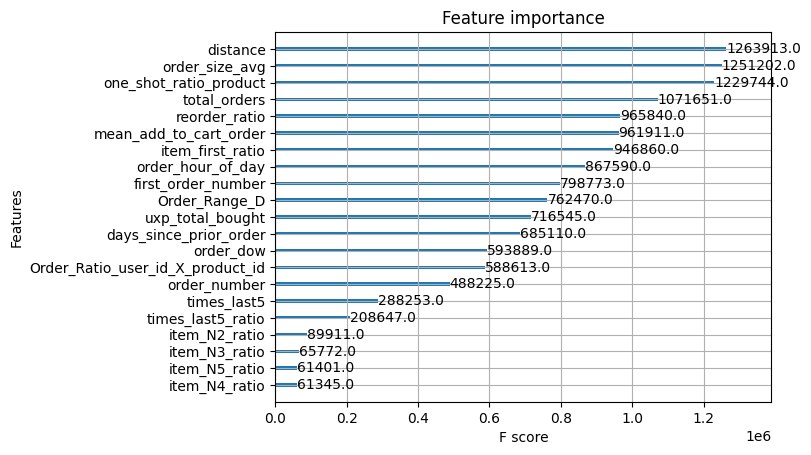

In [ ]:
import xgboost
from sklearn.model_selection import train_test_split
uxp_train.loc[:, 'reordered'] = uxp_train.reordered.fillna(0)


'''del uxp_train'''
gc.collect()

d_train = xgboost.DMatrix(X_train, y_train)
param = {'max_depth':15,
         'eta':0.02,
         'colsample_bytree':0.4,
         'subsample':0.75,
         'silent':1,
         'nthread':27,
         'eval_metric':'logloss',
         'binary':'logistic',
         'tree_method':'hist'
}

watchlist= [(d_train, "train")]
bst = xgboost.train(params=param, dtrain=d_train, num_boost_round=1000, evals=watchlist, early_stopping_rounds=40, verbose_eval=5)
xgboost.plot_importance(bst)

In [ ]:
d_test = xgboost.DMatrix(uxp_test)

uxp_test = uxp_test.reset_index()
uxp_test = uxp_test[['product_id', 'user_id']]

uxp_test["reordered"] = bst.predict(d_test)

del bst

In [ ]:
orders_test = orders[orders.eval_set=='test']

In [ ]:
uxp_test = uxp_test.merge(orders_test[["user_id", "order_id"]], on='user_id', how='left').drop('user_id', axis=1)
uxp_test.columns = ['product_id', 'prediction', 'order_id']
uxp_test.product_id = uxp_test.product_id.astype(int)
uxp_test.order_id = uxp_test.order_id.astype(int)
uxp_test.head()

,product_id,prediction,order_id
0,248,0.016701,2774568
1,1005,0.043113,2774568
2,1819,0.093567,2774568
3,7503,0.035028,2774568
4,8021,0.017324,2774568


In [ ]:
import numpy as np
from operator import itemgetter

class F1Optimizer():
    def __init__(self):
        pass

    @staticmethod
    def get_expectations(P, pNone=None):
        expectations = []
        P = np.sort(P)[::-1]

        n = np.array(P).shape[0]
        DP_C = np.zeros((n + 2, n + 1))
        if pNone is None:
            pNone = (1.0 - P).prod()

        DP_C[0][0] = 1.0
        for j in range(1, n):
            DP_C[0][j] = (1.0 - P[j - 1]) * DP_C[0, j - 1]

        for i in range(1, n + 1):
            DP_C[i, i] = DP_C[i - 1, i - 1] * P[i - 1]
            for j in range(i + 1, n + 1):
                DP_C[i, j] = P[j - 1] * DP_C[i - 1, j - 1] + (1.0 - P[j - 1]) * DP_C[i, j - 1]

        DP_S = np.zeros((2 * n + 1,))
        DP_SNone = np.zeros((2 * n + 1,))
        for i in range(1, 2 * n + 1):
            DP_S[i] = 1. / (1. * i)
            DP_SNone[i] = 1. / (1. * i + 1)
        for k in range(n + 1)[::-1]:
            f1 = 0
            f1None = 0
            for k1 in range(n + 1):
                f1 += 2 * k1 * DP_C[k1][k] * DP_S[k + k1]
                f1None += 2 * k1 * DP_C[k1][k] * DP_SNone[k + k1]
            for i in range(1, 2 * k - 1):
                DP_S[i] = (1 - P[k - 1]) * DP_S[i] + P[k - 1] * DP_S[i + 1]
                DP_SNone[i] = (1 - P[k - 1]) * DP_SNone[i] + P[k - 1] * DP_SNone[i + 1]
            expectations.append([f1None + 2 * pNone / (2 + k), f1])

        return np.array(expectations[::-1]).T

    @staticmethod
    def maximize_expectation(P, pNone=None):
        expectations = F1Optimizer.get_expectations(P, pNone)

        ix_max = np.unravel_index(expectations.argmax(), expectations.shape)
        max_f1 = expectations[ix_max]

        predNone = True if ix_max[0] == 0 else False
        best_k = ix_max[1]

        return best_k, predNone, max_f1

    @staticmethod
    def _F1(tp, fp, fn):
        return 2 * tp / (2 * tp + fp + fn)

    @staticmethod
    def _Fbeta(tp, fp, fn, beta=1.0):
        beta_squared = beta ** 2
        return (1.0 + beta_squared) * tp / ((1.0 + beta_squared) * tp + fp + beta_squared * fn)


def get_best_prediction(items, preds, pNone=None):
#    print("Maximize F1-Expectation")
#    print("=" * 23)
    items_preds = sorted(list(zip(items, preds)), key=itemgetter(1), reverse=True)
    P = [p for i,p in items_preds]
    L = [i for i,p in items_preds]

    opt = F1Optimizer.maximize_expectation(P)
    best_prediction = []
    best_prediction += (L[:opt[0]])
    if best_prediction == []:
        best_prediction = ['None']

#    print("Prediction {} yields best E[F1] of {}\n".format(best_prediction, f1_max))
    return ' '.join(list(map(str,best_prediction)))

In [ ]:
import pandas as pd
import multiprocessing as mp
import time

#==============================================================================
# load
#==============================================================================
sub_item = uxp_test.groupby(['order_id','product_id']).prediction.mean().reset_index()
sub = sub_item.groupby('order_id').product_id.apply(list).to_frame()
sub['yhat'] = sub_item.groupby('order_id').prediction.apply(list)
sub.reset_index(inplace=True)

gc.collect()

def multi(i):
    if i%1000==0:
        print('{:.3f} min'.format((time.time()-st_time)/60))
    items = sub.loc[i,'product_id']
    preds = sub.loc[i,'yhat']
    ret = get_best_prediction(items, preds)
    return ret

st_time = time.time()
pool = mp.Pool(4)
callback = pool.map(multi, range(sub.shape[0]))

sub['products'] = callback
sub.head()

0.009 min
0.122 min
0.234 min
0.318 min
0.372 min
0.445 min
0.561 min
0.655 min
0.693 min
0.797 min
0.919 min
1.029 min
1.077 min
1.136 min
1.271 min
1.355 min
1.465 min
1.476 min
1.624 min
1.682 min
1.774 min
1.811 min
1.959 min
2.027 min
2.145 min
2.146 min
2.327 min
2.332 min
2.485 min
2.518 min
2.658 min
2.662 min
2.817 min
2.847 min
2.993 min
3.017 min
3.134 min
3.182 min
3.308 min
3.314 min
3.469 min
3.504 min
3.628 min
3.641 min
3.804 min
3.865 min
3.963 min
3.990 min
4.166 min
4.188 min
4.337 min
4.366 min
4.520 min
4.537 min
4.646 min
4.750 min
4.851 min
4.858 min
4.968 min
5.058 min
5.180 min
5.228 min
5.283 min
5.405 min
5.527 min
5.551 min
5.615 min
5.736 min
5.871 min
5.877 min
5.954 min
6.140 min
6.216 min
6.241 min
6.498 min


,order_id,product_id,yhat,products
0,17,"[1283, 6291, 7035, 11494, 13107, 13535, 15613,...","[0.04640072584152222, 0.00947539135813713, 0.0...",21463 13107 26429 40002
1,34,"[651, 2361, 2596, 4031, 5134, 5242, 6317, 7035...","[0.03438039496541023, 0.025380779057741165, 0....",39475 21137 16083 43504 47766 47792 2596 48523...
2,137,"[311, 1335, 2078, 2326, 2661, 3951, 5025, 5114...","[0.020301051437854767, 0.008355183526873589, 0...",24852 23794 38689 41787 16797 25890 2326 28934...
3,182,"[1244, 1757, 2078, 2295, 2480, 3397, 4344, 442...","[0.07615655660629272, 0.026081476360559464, 0....",9337 13629 5479 39275 11520 47209 47672 33000 ...
4,257,"[1025, 2063, 2309, 4605, 4683, 6795, 8277, 103...","[0.20795825123786926, 0.1299629509449005, 0.02...",49235 24852 29837 27966 21137 27104 30233 3764...


In [ ]:
sub.reset_index(inplace=True)
sub = sub[['order_id', 'products']]

In [ ]:
%cd

/root


In [ ]:
print(sub.shape[0])
print(sub.shape[0]==75000)

sub.to_csv('/content/submission.csv', index=False)

75000
True


In [ ]:
sub

,order_id,products
0,17,21463 13107 26429 40002
1,34,39475 21137 16083 43504 47766 47792 2596 48523...
2,137,24852 23794 38689 41787 16797 25890 2326 28934...
3,182,9337 13629 5479 39275 11520 47209 47672 33000 ...
4,257,49235 24852 29837 27966 21137 27104 30233 3764...
...,...,...
74995,3420740,35951 49005 39146 28476 46252 30391 16291 1836...
74996,3420877,21137 5161 13646 13176 31766 8277 12238 27966 ...
74997,3420888,35951 10880 44632 2361 46906
74998,3420989,35004 42450 13517 47766 46676 43210 47229 3016...
